# **Notebook Preface**
---
This notebook is meant for the INSAID GCD Term 1 and Term 2 EDA project which due on 19th July, 2020. All the content in this notebook is solely developed and owned by Sachin Karkun who is part of the INSAID's April 2020 cohort. 


# **Project Overview**
---
Wine industry relies heavily on tasting, to evaluate the quality. However, based on the various ingredients, in next few sections, it would be ascertained, what proportion of each ingredient would lead to best quality of wine, using **Exploratory Data Analysis(EDA)**.

EDA would consist of following steps:
* Insight into the data set and metadata.
* Extract important features and understand relationship relationships between them
* Test underlying assumptions

# **Code Block**
----

This section would contain the Python source code.

**Source of Data:** https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/winequality.csv

## **Header Block**

In [2]:
# Importing libraries for the code
import numpy as np
import pandas as pd
pd.set_option('mode.chained_assignment',None) # Option to suppress pandas warning
pd.set_option('display.max_colwidth', None) # Option to show all the data in each column
pd.options.display.max_columns = 50 # Option to show all the columns in the head() output

import warnings
warnings.filterwarnings('ignore')  # Option to ignore warnings

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='darkgrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [3]:
# install chart-studio charts and visualization
'!pip install chart-studio --upgrade'

'!pip install chart-studio --upgrade'

In [4]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

In [5]:
# install pandas-profiling for profiling data frame and support descriptive statistics
'!pip install pandas-profiling --upgrade'
import pandas_profiling
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [145]:
plt.style.use('seaborn-whitegrid')                  # To apply seaborn whitegrid style to the plots.
sns.set(style='whitegrid', font_scale=0.7, color_codes=True)      # To adjust seaborn settings for the plots.

## **Data Import Block**


In [39]:
#Importing wine data into data frame
df_wine_data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/winequality.csv')

## **Pre-Profiling and Cleansing**

In [40]:
#Check Data Type
df_wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [41]:
#Run head to view the attributes and data in each attribute
df_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [42]:
df_wine_data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [43]:
df_wine_data.shape

(6497, 12)

### *Observation*
* Data is all numerical in nature. Except quality all other fields have float data. 
* There are total 6497 rows and 12 column attributes. The head() and tail() output, shows that the quality field in the data set can be assumed ordinal in nature. 
* To further validate the assumption, a univariate analysis needs to be performed. As next step, check for descriptive statistics, to draw further inferences.  

In [44]:
#Check descriptive statistics numbers
df_wine_data.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [45]:
# Checking unique value counts for each attribute
for i in df_wine_data.columns:
    print("Unique Values count in ",i,": ",df_wine_data[i].nunique())    

Unique Values count in  fixed acidity :  106
Unique Values count in  volatile acidity :  187
Unique Values count in  citric acid :  89
Unique Values count in  residual sugar :  316
Unique Values count in  chlorides :  214
Unique Values count in  free sulfur dioxide :  135
Unique Values count in  total sulfur dioxide :  276
Unique Values count in  density :  998
Unique Values count in  pH :  108
Unique Values count in  sulphates :  111
Unique Values count in  alcohol :  111
Unique Values count in  quality :  7


### *Observation*
* From .describe() output, it is infered that the fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, pH, sulphates, and alcohol have higher mean than median value(50%) respectively.
* Total sulfur dioxide and density  have lower mean than median value(50%) respectively.
* fixed acidity, residual sugar, free sulfur dioxide and total sulfur dioxide has significant difference between 75% value and max. This indicates skewedness in the data set.

Additionallly, for the dependent variable, below are the findings :

In [46]:
df_wine_data['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

* In the quality scale 0 and 10 denote the lowest and highest quality of wine respectively.
* The quality of wine ranges between 3 and 9.


Running Pandas profiling to gain more insights.


In [47]:
#Run Pandas Profiling
pre_profile = pandas_profiling.ProfileReport(df_wine_data)
pre_profile.to_file(output_file="profiling_pre_processing.html")

### *Observation*

* Most of the indenpendent variables namely fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, density and alcohol are right skewed. Hence variables need to be normalized.
* Citric acid has zeroes.
* There 1179 rows in the data set, which can be removed.


In [48]:
df_wine_data[df_wine_data.duplicated()].count()

fixed acidity           1179
volatile acidity        1179
citric acid             1179
residual sugar          1179
chlorides               1179
free sulfur dioxide     1179
total sulfur dioxide    1179
density                 1179
pH                      1179
sulphates               1179
alcohol                 1179
quality                 1179
dtype: int64

In [49]:
df_wine_data.drop_duplicates(inplace=True)

Verifying again if duplicates stil exist.

In [50]:
df_wine_data[df_wine_data.duplicated()].count()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no more duplicate information in the data set.

Additional check to see if a given combination of fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates,and alcohol content is tagged with more than one quality.

In [51]:
df_wine_data_together=df_wine_data.groupby(["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]).agg({"quality":np.size}).rename(columns={'quality':'num_of_quality_tags'})
df_wine_data_together[df_wine_data_together['num_of_quality_tags']>1].count()

num_of_quality_tags    0
dtype: int64

Given combination of fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates,and alcohol content is only tagged to only 1 quality tag.

Moving forward with normalizing the data set.

In [134]:
df_wine_data_std = df_wine_data.copy()

In [135]:
df_wine_data_std.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5318 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5318 non-null   float64
 1   volatile acidity      5318 non-null   float64
 2   citric acid           5318 non-null   float64
 3   residual sugar        5318 non-null   float64
 4   chlorides             5318 non-null   float64
 5   free sulfur dioxide   5318 non-null   float64
 6   total sulfur dioxide  5318 non-null   float64
 7   density               5318 non-null   float64
 8   pH                    5318 non-null   float64
 9   sulphates             5318 non-null   float64
 10  alcohol               5318 non-null   float64
 11  quality               5318 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 540.1 KB


Data set only has 5318 rows.

Proceeding with standardizing all columns and normalizing values for fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, and alcohol.

In [136]:
for i in df_wine_data.columns:
   # print(i)
    if (i != 'quality'):
        #print((df_wine_data[i]-df_wine_data[i].min())/(df_wine_data[i].max()-df_wine_data[i].min()))
           df_wine_data_std[i]=(df_wine_data[i]-df_wine_data[i].min())/(df_wine_data[i].max()-df_wine_data[i].min())
df_wine_data_std['std_fixed_acidity']=np.log(df_wine_data['fixed acidity'])
df_wine_data_std['std_volatile_acidity']=np.log(df_wine_data['volatile acidity'])
df_wine_data_std['std_citric_acid']=np.log(df_wine_data['citric acid'])
df_wine_data_std['std_residual_sugar']=np.log(df_wine_data['residual sugar'])
df_wine_data_std['std_chlorides']=np.log(df_wine_data['chlorides'])
df_wine_data_std['std_free_sulfur_dioxide']=np.log(df_wine_data['free sulfur dioxide'])
df_wine_data_std['std_alcohol']=np.log(df_wine_data['alcohol'])
df_wine_data_std['std_density']=np.log(df_wine_data['density'])


Validating shape of the updated data set


In [137]:
df_wine_data_std.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,std_fixed_acidity,std_volatile_acidity,std_citric_acid,std_residual_sugar,std_chlorides,std_free_sulfur_dioxide,std_alcohol,std_density
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,5,2.001480,-0.356675,-inf,0.641854,-2.577022,2.397895,2.240710,-0.002202
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,5,2.054124,-0.127833,-inf,0.955511,-2.322788,3.218876,2.282382,-0.003205
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,5,2.054124,-0.274437,-3.218876,0.832909,-2.385967,2.708050,2.282382,-0.003005
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,6,2.415914,-1.272966,-0.579818,0.641854,-2.590267,2.833213,2.282382,-0.002002
5,0.297521,0.386667,0.000000,0.018405,0.109635,0.041667,0.078341,0.206092,0.612403,0.191011,0.202899,5,2.001480,-0.415515,-inf,0.587787,-2.590267,2.564949,2.240710,-0.002202


Getting Describe statistics of the data.

In [138]:
df_wine_data_std.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,std_fixed_acidity,std_volatile_acidity,std_citric_acid,std_residual_sugar,std_chlorides,std_free_sulfur_dioxide,std_alcohol,std_density
count,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000
mean,0.282275,0.176114,0.191881,0.068245,0.079237,0.100800,0.249096,0.143170,0.391193,0.176068,0.369452,5.795600,1.961454,-1.168694,-inf,1.260499,-2.985352,3.195709,2.349903,-0.005483
std,0.109072,0.112176,0.088661,0.069028,0.061237,0.061821,0.130838,0.057173,0.124344,0.084131,0.171879,0.879715,0.167721,0.442380,NaN,0.840459,0.442003,0.703030,0.110225,0.002979
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.335001,-2.525729,-inf,-0.510826,-4.710531,0.000000,2.079442,-0.012974
25%,0.214876,0.100000,0.144578,0.018405,0.048173,0.052083,0.156682,0.098130,0.302326,0.117978,0.217391,5.000000,1.856298,-1.469676,-1.427116,0.587787,-3.270169,2.772589,2.251292,-0.007831
50%,0.264463,0.146667,0.186747,0.032209,0.063123,0.093750,0.253456,0.145556,0.379845,0.162921,0.347826,6.000000,1.945910,-1.203973,-1.171183,0.993252,-3.057608,3.332205,2.341806,-0.005354
75%,0.322314,0.220000,0.240964,0.105828,0.094684,0.138889,0.340438,0.186235,0.472868,0.213483,0.492754,6.000000,2.041220,-0.891598,-0.916291,2.014903,-2.718101,3.713572,2.433613,-0.003235
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,2.766319,0.457425,0.506818,4.186620,-0.492658,5.666427,2.701361,0.038239


std_citric_acid has NaN and -inf values, which are not desirable. Hence, replacing the values with square root of citric acid variable.

In [139]:
df_wine_data_std['std_citric_acid']=np.sqrt(df_wine_data['citric acid'])

Revalidating descriptive statistics

In [140]:
df_wine_data_std.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,std_fixed_acidity,std_volatile_acidity,std_citric_acid,std_residual_sugar,std_chlorides,std_free_sulfur_dioxide,std_alcohol,std_density
count,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000
mean,0.282275,0.176114,0.191881,0.068245,0.079237,0.100800,0.249096,0.143170,0.391193,0.176068,0.369452,5.795600,1.961454,-1.168694,0.542178,1.260499,-2.985352,3.195709,2.349903,-0.005483
std,0.109072,0.112176,0.088661,0.069028,0.061237,0.061821,0.130838,0.057173,0.124344,0.084131,0.171879,0.879715,0.167721,0.442380,0.156746,0.840459,0.442003,0.703030,0.110225,0.002979
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.335001,-2.525729,0.000000,-0.510826,-4.710531,0.000000,2.079442,-0.012974
25%,0.214876,0.100000,0.144578,0.018405,0.048173,0.052083,0.156682,0.098130,0.302326,0.117978,0.217391,5.000000,1.856298,-1.469676,0.489898,0.587787,-3.270169,2.772589,2.251292,-0.007831
50%,0.264463,0.146667,0.186747,0.032209,0.063123,0.093750,0.253456,0.145556,0.379845,0.162921,0.347826,6.000000,1.945910,-1.203973,0.556776,0.993252,-3.057608,3.332205,2.341806,-0.005354
75%,0.322314,0.220000,0.240964,0.105828,0.094684,0.138889,0.340438,0.186235,0.472868,0.213483,0.492754,6.000000,2.041220,-0.891598,0.632456,2.014903,-2.718101,3.713572,2.433613,-0.003235
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,2.766319,0.457425,1.288410,4.186620,-0.492658,5.666427,2.701361,0.038239


## **Post-Profiling**

In [141]:
#Run Pandas Profiling
post_profile = pandas_profiling.ProfileReport(df_wine_data_std)
post_profile.to_file(output_file="profiling_post_processing.html")

## *Observation*

Data is reasonably skewed to further proceed with correlation

Checking correlations

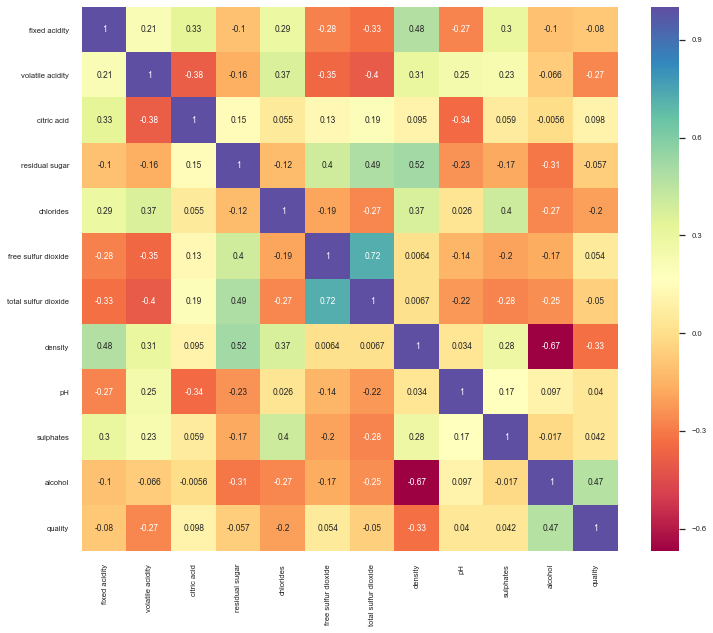

In [151]:
plt.figure(figsize=(12,10))
#df_wine_data_std.drop(['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density'],axis=1,inplace=True)
#df_wine_data_std.drop(['alcohol'],axis=1,inplace=True)
sns.heatmap(df_wine_data.corr(),cmap='Spectral',annot=True)

## *Observation*

It appears that level of alcohol and density has the most significant effect on the quality.
There is a very strong correlation between free sulfur dioxide and total sulfur dioxide, followed by density and residual sugar.
There is almost no correlation between density, and free sulfur dioxide and total sulfur dioxide levels.

Looking further into data with quality score >7.

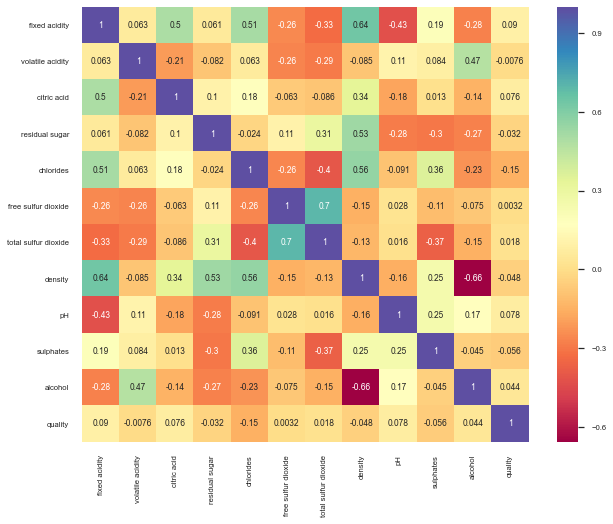

In [152]:
df_wine_data_plot=df_wine_data[df_wine_data['quality']>7].copy()
plt.figure(figsize=(10,8))
sns.heatmap(df_wine_data_plot.corr(),cmap='Spectral',annot=True)

## *Observation*

It appears that with higher quality score greater than 7 fixed_acidity have high correlation with quality followed by pH and alcohol has the most significant correlation on the quality.
free sulfur dioxide and volatile has almost zero correlation with quality.
density is highly correlated to fixed acidity and negatively correlated to quality.

Showing further comparison between alcohol and density for all grades

Text(0.5, 1.0, 'Scatter plot showing the correlation between standard level of alcohol and density')

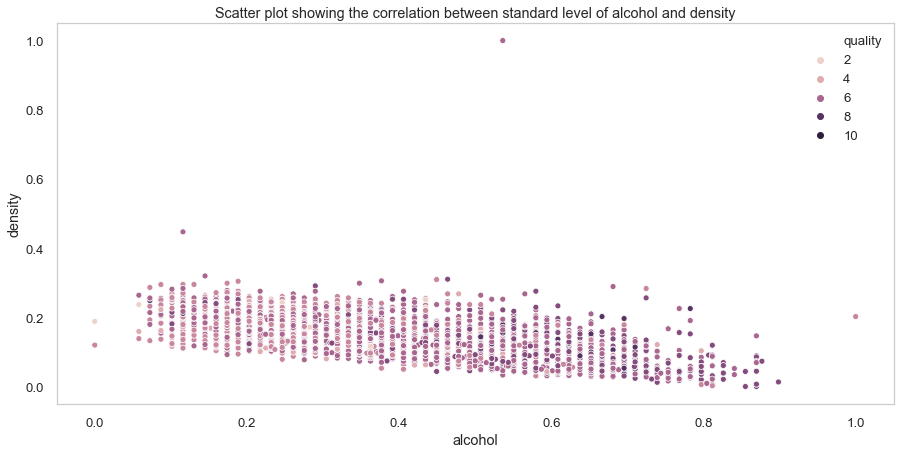

In [165]:
plt.figure(figsize=(15, 7))
sns.set(style='whitegrid', font_scale=1.2, color_codes=True)      # To adjust seaborn settings for the plots.
sns.scatterplot(data=df_wine_data_std, x = 'alcohol', y='density', hue='quality')
plt.grid(False)
plt.xlabel('alcohol')
plt.ylabel('density')
plt.title('Scatter plot showing the correlation between standard level of alcohol and density')

Text(0.5, 1.0, 'Scatter plot showing the correlation between standardized levels of alcohol and volatile acidity')

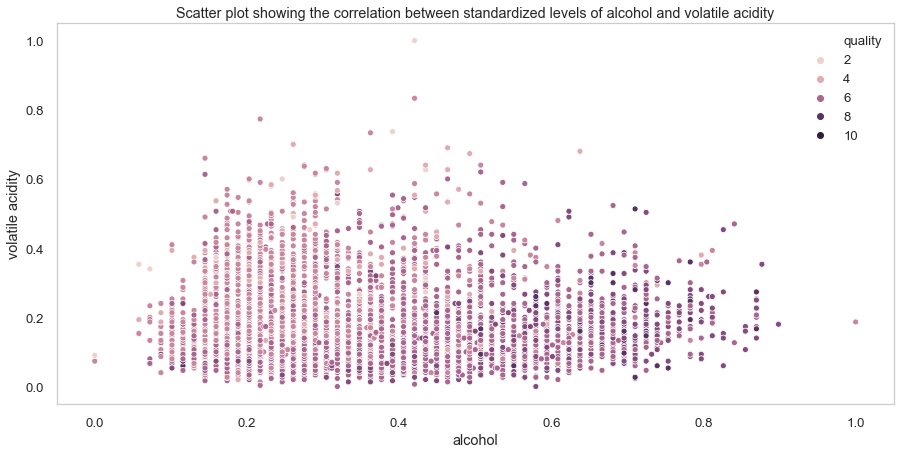

In [160]:
plt.figure(figsize=(15, 7))
sns.set(style='whitegrid', font_scale=1.2, color_codes=True)      # To adjust seaborn settings for the plots.
sns.scatterplot(data=df_wine_data_std, x = 'alcohol', y='volatile acidity', hue='quality')
plt.grid(False)
plt.xlabel('alcohol')
plt.ylabel('volatile acidity')
plt.title('Scatter plot showing the correlation between standardized levels of alcohol and volatile acidity')

Text(0.5, 1.0, 'Scatter plot plot showing the between standardized levels of alcohol and volatile acidity')

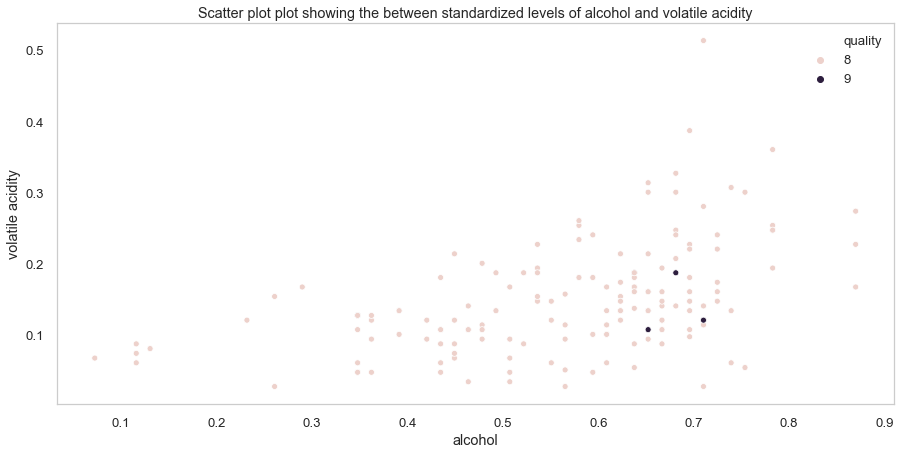

In [156]:
df_wine_data_std_sup = df_wine_data_std[df_wine_data_std['quality']>7].copy()
plt.figure(figsize=(15, 7))
sns.set(style='whitegrid', font_scale=1.2, color_codes=True)      # To adjust seaborn settings for the plots.
sns.scatterplot(data=df_wine_data_std_sup, x = 'alcohol', y='volatile acidity', hue='quality')
plt.grid(False)
plt.xlabel('alcohol')
plt.ylabel('volatile acidity')
plt.title('Scatter plot showing the between standardized levels of alcohol and volatile acidity')

Text(0.5, 1.0, 'Effect of quality based on density,alcohol,volatile acidity and residual suagr levels')

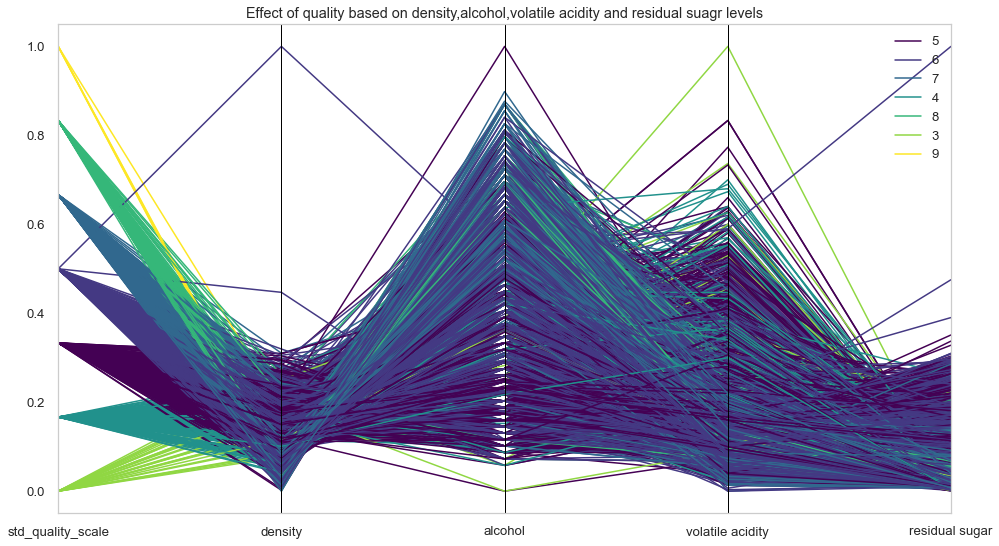

In [178]:
for i in df_wine_data_std["quality"]:
    if (i >= 0) & (i<= 3):
        df_wine_data_std["Quality_Grade"]='Poor'
    elif (i > 3) & (i < 6):
        df_wine_data_std["Quality_Grade"]='Good'
    else:
        df_wine_data_std["Quality_Grade"]='Excellent'

df_wine_data_std["std_quality_scale"]=(df_wine_data_std["quality"]-df_wine_data_std["quality"].min())/(df_wine_data_std["quality"].max()-df_wine_data_std["quality"].min())
plt.figure(figsize=(16,9))
pd.plotting.parallel_coordinates(df_wine_data_std, 
                     class_column='quality', colormap='viridis',  
                     cols=['std_quality_scale','density', 'alcohol', 'volatile acidity', 'residual sugar'])
plt.title('Effect of quality based on density,alcohol,volatile acidity and residual suagr levels')